
# Project: Investigate a Dataset (No-show-appointments-kagglev2-may-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li> ‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
    <li>‘Neighborhood’ indicates the location of the hospital.</li>
<li> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li> Be careful about the encoding of the last column: it says ‘No’ ifthe patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>
<b>Questions</b>
<ol>
    <li>What is the percentage of show and no_show for the appointments.</li>
    <li>What factors(Age,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received) are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>
    <li>Whether weekday or weekends determine any trend for the dependent variable.</li>
</ol>
    

In [49]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis. Here we will first read the dataset then check it's cleanliness. We will apply different techniques to ensure after data wrangling, data is much more clean and meaningful. Data wrangling will include removal of duplicate values, spelling corrections, replacing null values with significant values, removal of unwanted columns, etc.

### General Properties

In [50]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments.csv")
df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


<b>Information about the dataset</b>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above details we can see that there is no Null value in any column.

<b>Summary of the dataset</b>

In [52]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<b>Checking for duplicate values</b>

In [53]:
print("Number of duplicates",sum(df.duplicated()))

Number of duplicates 0


So, here we can see that AppointmentDay is the day for which we should be calculation shows and no-shows. ScheduledDay is the day of booking appointment.

<b>Checking Age 0 or negative</b>

In [54]:
df[df['Age']<=0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No



### Data Cleaning (Data type changing, Removing unwanted columns, spelling correction of column names, correcting Age values)

<b>Converting Data type of columns having dates to datetime from string.</b>

In [55]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df.info()

#df['Day Of Appointment']=df['AppointmentDay'].dt.weekday_name


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<b>Removal of Unwanted Columns</b>
<p>
As 'No-show' is the dependent variable here and there are various factors like Alcoholism, Age, Hypertension, etc which are independent variables. So we can remove some irrelevent columns such as PatientId,AppointmentID,ScheduledDay.In analysing the trend of patients showing up for appointments, there are certain columns which will not be any deciding factor for the dependent variable here. Such columns arePatientId,AppointmentID,ScheduledDay,Neighbourhood. However we are not deleting AppointmentDay just to see the trend of patients showing up for their appointments in different days (Weekdays and weekends). </p>

In [56]:
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood'],axis=1,inplace=True)
#We have used Inplace so that deletionis affected on the dataframe itself not on it's temporary instance.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 8.4+ MB


<b>Adding new column Day of Appointment, which we can use to explore the rates of show and no-show for particular days and if there is any dependency of weekdays or weekends on number of turnups.</b>

In [57]:
df['Day Of Appointment']=df['AppointmentDay'].dt.weekday_name
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender                110527 non-null object
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
No-show               110527 non-null object
Day Of Appointment    110527 non-null object
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 9.3+ MB


<b>Spelling Correction of Column Names</b>
<p>There are few Columns like Hypertension, Handicap which are having spelling errors. No-show is changed to No_show to use dot operation for column access. </p>

In [58]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

#checking the corrected spelling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender                110527 non-null object
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Scholarship           110527 non-null int64
Hypertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handicap              110527 non-null int64
SMS_received          110527 non-null int64
No_show               110527 non-null object
Day Of Appointment    110527 non-null object
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 9.3+ MB


<b>Replacing Age with mean value where age is 0 or negative</b>

In [59]:
df.Age[df['Age']<=0]=df['Age'].mean()
df[df['Age']<=0]


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Gender,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Day Of Appointment


<b>Changing the value and datatype for No_show column.</b>
<ul>
<li>If the value is 'Yes' meaning that the patient did not turn up for the appointment. The value is Changed to 0.</li>
<li>If the value is 'No' meaning that the patient had turned up for the appointment. The value is Changed to 1.</li>
</ul>
<p>Two new columns are being created of boolean type. Thaose will be used for subsetting the dataframe. Two Columns are 'not_show' having 'True' value if the patient had not turned up. While, 'show' will have 'True' value if the patient had turned up.</p>

In [60]:
df.No_show[df['No_show']=='Yes']='1'
df.No_show[df['No_show']=='No']='0'

df['No_show']=(df['No_show']).astype(float)

#masking for show and no_show
no_show=df['No_show']==1
show=df['No_show']==0
df['no_show']=no_show
df['show']=show
df.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Gender,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Day Of Appointment,no_show,show
0,F,2016-04-29,62.0,0,1,0,0,0,0,0.0,Friday,False,True
1,M,2016-04-29,56.0,0,0,0,0,0,0,0.0,Friday,False,True
2,F,2016-04-29,62.0,0,0,0,0,0,0,0.0,Friday,False,True
3,F,2016-04-29,8.0,0,0,0,0,0,0,0.0,Friday,False,True
4,F,2016-04-29,56.0,0,1,1,0,0,0,0.0,Friday,False,True


In [61]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<b>Handicap column is having maximum value 4, which we need to fix. We will check if there is any value except 0 or 1, we will delete that row.</b>

In [62]:
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [63]:
df.drop(df.index[df['Handicap']==2],inplace=True)
df.drop(df.index[df['Handicap']==3],inplace=True)# & df['Handicap']==0]
df.drop(df.index[df['Handicap']==4],inplace=True)
df['Handicap'].value_counts()

0    108286
1      2042
Name: Handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
<p>With data being cleaned and trimmed it is time for analysis part. In this section we will explore different factors and analyse whether those factor has any influence on our dependent variable.</p>

### Research Question 1 (What is the percentage of show and no_show for the appointments.)

In [64]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,38.260456,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179,0.201925
std,22.091123,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931,0.401438
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0.0    88050
1.0    22278
Name: No_show, dtype: int64


([<matplotlib.patches.Wedge at 0x264d1b33a58>,
 [Text(-1.3289879737823165, 0.9779013066470323, 'Shown'),
  Text(1.3289880195611794, -0.9779012444326138, 'Not_shown')],
 [Text(-0.7249025311539907, 0.533400712716563, '79.81%'),
  Text(0.7249025561242796, -0.5334006787814256, '20.19%')])

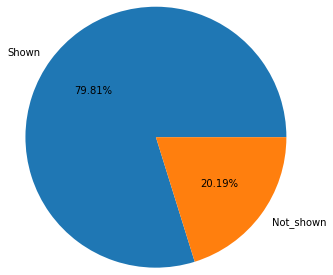

In [65]:
shows=df['No_show'].value_counts()
print(shows)
#print(df[df['No_show']!=0])
zeros=shows[0]
ones=shows[1]
pie_values=[zeros,ones]
pie_labels=['Shown','Not_shown']
plt.pie(pie_values,labels=pie_labels,radius=1.5,autopct='%0.2f%%')
#df[df['No_show']!=0]


From the above pie-chart, we can see approximately 80% people showed up in their appointments and rest 20% did not.

In [66]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,38.260456,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179,0.201925
std,22.091123,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931,0.401438
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Research Question 2  (What factors(Age,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received) are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

<b>Analysis for age</b>

In [67]:
df.Age[show].mean()

38.998635140125764

In [68]:
df.Age[no_show].mean()

35.34292982409997

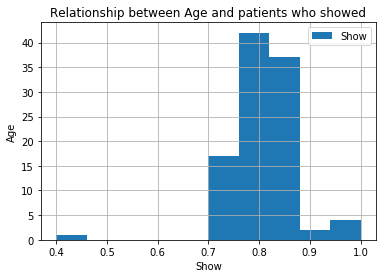

In [69]:
df.groupby('Age')['show'].mean().hist(label='Show')
plt.xlabel('Show')
plt.ylabel('Age')
plt.title('Relationship between Age and patients who showed')
plt.legend()

Mean age of patients showed is 38.998635140125764. Mean age of patients did not showed 35.34292982409997.

Gender
F    0.796908
M    0.800244
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between Gender and their show rates')

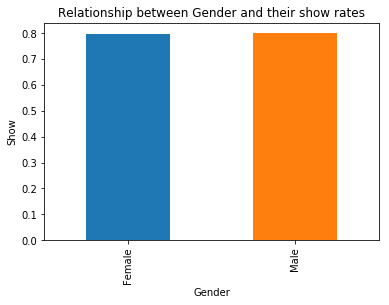

In [70]:
print(df.groupby('Gender')['show'].mean())
df.groupby('Gender')['show'].mean().plot(kind='bar')
plt.ylabel("Show")
plt.xticks([0,1],('Female','Male'))
plt.title('Relationship between Gender and their show rates')

Around 80 % both male and female showed up for the appointment.  

Scholarship
0    0.801970
1    0.762335
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between Scholarship and patient show rates')

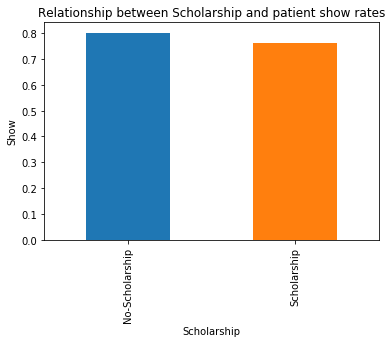

In [71]:
print(df.groupby('Scholarship')['show'].mean())
df.groupby('Scholarship')['show'].mean().plot(kind='bar')
plt.ylabel("Show")
plt.xticks([0,1],('No-Scholarship','Scholarship'))
plt.title('Relationship between Scholarship and patient show rates')

Around 80% of patients not having scholarship showed up for the appointment.
Whereas, only 76% of patients having scholarship showed up.

Hypertension
0    0.790886
1    0.827408
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between Hypertension and patient show rates')

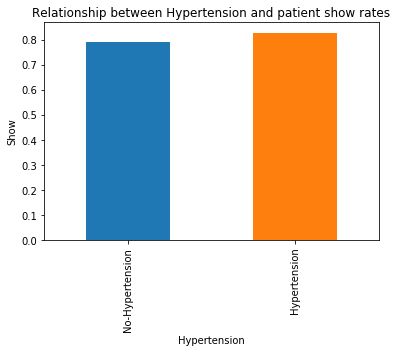

In [72]:
print(df.groupby('Hypertension')['show'].mean())
df.groupby('Hypertension')['show'].mean().plot(kind='bar')
plt.ylabel("Show")
plt.xticks([0,1],('No-Hypertension','Hypertension'))
plt.title('Relationship between Hypertension and patient show rates')

82.74% of patients having Hypertension showed up. Approximately 79% of patients not having hypertension showed.

Diabetes
0    0.796384
1    0.820000
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between Diabetes and patient show rates')

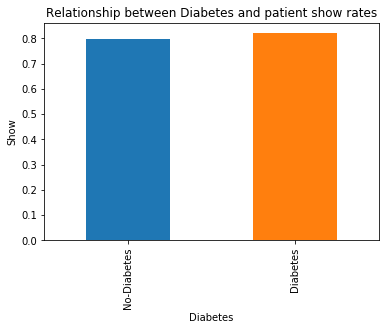

In [73]:
print(df.groupby('Diabetes')['show'].mean())
df.groupby('Diabetes')['show'].mean().plot(kind='bar')
plt.ylabel("Show")
plt.xticks([0,1],('No-Diabetes','Diabetes'))
plt.title('Relationship between Diabetes and patient show rates')

82% of patients who are diabetic showed. Whereas, 79.63% of those not having diabetes showed.

Handicap
0    0.797647
1    0.820764
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between being handicap and patient show rates')

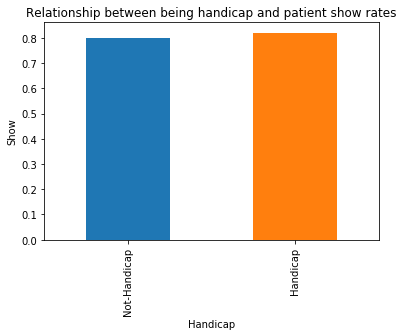

In [74]:
print(df.groupby('Handicap')['show'].mean())
df.groupby('Handicap')['show'].mean().plot(kind='bar')
plt.ylabel("Show")
plt.xticks([0,1],('Not-Handicap','Handicap'))
plt.title('Relationship between being handicap and patient show rates')

79.76% of those patients who are not handicapped showed up. 82.07% of patients who were handicapped showed.

Alcoholism
0    0.798058
1    0.798628
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between Alcoholism and patient show rates')

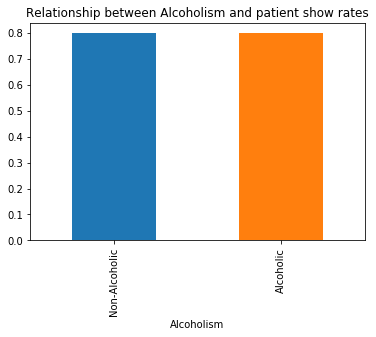

In [75]:
print(df.groupby('Alcoholism')['show'].mean())
df.groupby('Alcoholism')['show'].mean().plot(kind='bar')
plt.xticks([0,1],('Non-Alcoholic','Alcoholic'))
plt.title('Relationship between Alcoholism and patient show rates')

79.8% of patients in both the cases(Alcoholic and non-alcoholic) showed. Therefore Alcoholism has no effect on patients showing up for appointments.

SMS_received
0    0.833055
1    0.724143
Name: show, dtype: float64


Text(0.5, 1.0, 'Relationship between SMS-Received and patient show rates')

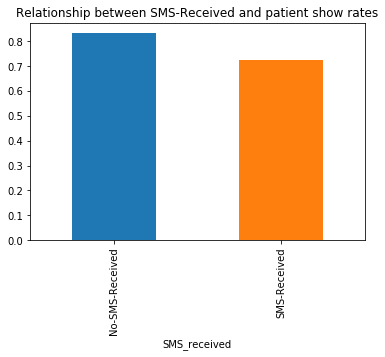

In [76]:
print(df.groupby('SMS_received')['show'].mean())
df.groupby('SMS_received')['show'].mean().plot(kind='bar')
plt.xticks([0,1],('No-SMS-Received','SMS-Received'))
plt.title('Relationship between SMS-Received and patient show rates')

83.3% of patients who did not received SMS showed. Whereas, 72.41% of patients receiving SMS showed. Therefore, sending SMS is definitely not the right option to ensure higher percentage of patients showing.

### Research Question  3 (Whether weekday or weekends determine any trend for the dependent variable.)

Day Of Appointment
Friday       0.787569
Monday       0.793598
Saturday     0.769231
Thursday     0.806296
Tuesday      0.799250
Wednesday    0.803129
Name: show, dtype: float64


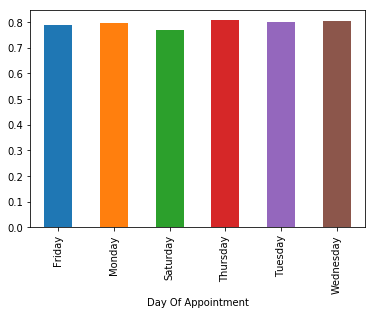

In [77]:
print(df.groupby('Day Of Appointment')['show'].mean())
df.groupby('Day Of Appointment')['show'].mean().plot(kind='bar')

Day Of Appointment
Friday       0.212431
Monday       0.206402
Saturday     0.230769
Thursday     0.193704
Tuesday      0.200750
Wednesday    0.196871
Name: no_show, dtype: float64


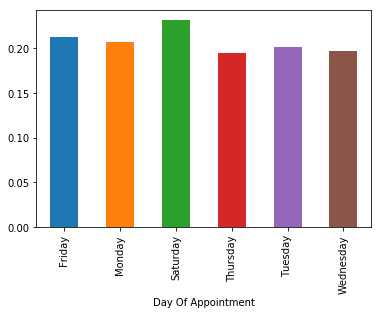

In [78]:
print(df.groupby('Day Of Appointment')['no_show'].mean())
df.groupby('Day Of Appointment')['no_show'].mean().plot(kind='bar')

It can be seen that highest percentage of patients not showing up for appointments is on Saturday. So, we can think of that more percentage of patients like to skip appointments if the appointment date fall on weekends (Saturday). WE can see during the weekdays, the percentage of shown is much higher. Thursday is having the heighest percentage of patients showing up and Saturday having the least.

## Limitations:
<b>These are the following hindrance faced while exploring the dataset: </b>
<ul>
    <li>Age of patients were 0 or negative, which is definitely illogical or rather impossible.</li>
    <li>Where for the Handicap column, data was supposed to be either 0 or 1. It contained other vales as well(2,3,4).</li>
 </ul> 
 
 <b>Parameters that could have been useful if it was provided:</b>
 <ul>
 <li>There could have been better parameters for checking show or no show, if past medical records of patients were given, it would have helped us to analyse better. Whether a patient is having serious illness or a long medical history of illness.</li>
    <li>If patient's residence was also mentioned and the distance his/her residence to hospital was also mentioned then it would have been better for analysis whether distance from the residence matter or not.</li>
    <li>Whether the patient is employed or not, if yes then what is the office hours. Whether office timings is having any impact on the show for appointments or not. What is the distance between office and hospital.</li>
</ul>

<a id='conclusions'></a>
## Conclusions
<ul>
    <li>79.81% of patients showed up for the appointments. Remaning 20.19% did not show.</li>
    <li>Mean age of patients showed is 38.998635140125764. Mean age of patients did not showed 35.34292982409997. Therefore mean age of patients showing up is more.</li>
    <li>Around 80 % both male and female showed up for the appointment. So, number of patients showing up for appointments does not depend on gender.</li>
    <li>Around 80% of patients not having scholarship showed up for the appointment.
Whereas, only 76% of patients having scholarship showed up.</li>
    <li>82.74% of patients having Hypertension showed up. Approximately 79% of patients not having hypertension showed.
    82% of patients who are diabetic showed. Whereas, 79.63% of those not having diabetes showed.So, the rate of patients showing up for appointments are higher in case of patients having Hypertension or Diabetes than those who are not having these illness.</li>
    <li>79.76% of those patients who are not handicapped showed up. 82.07% of patients who were handicapped showed. So percentage of people who are handicapped turned up more for the appointments.</li>
    <li>79.8% of patients in both the cases(Alcoholic and non-alcoholic) showed. Therefore Alcoholism has no effect on patients showing up for appointments.</li>
    <li>83.3% of patients who did not received SMS showed. Whereas, 72.41% of patients receiving SMS showed. Therefore, sending SMS is definitely not the right option to ensure higher percentage of patients showing.</li>
    <li>83.3% of patients who did not received SMS showed. Whereas, 72.41% of patients receiving SMS showed. Therefore, sending SMS is definitely not the right option to ensure higher percentage of patients showing.</li>
</ul>